# Every thing has a cost!

This notebook is going to determine the cost of equity, debt and captial.

I have considered S&P 500 Index(^GSPC) as the market and Amazon.com Inc(AMZN), Microsoft Corp(MSFT) and Alphabet Inc. Class C(GOOG) as the companies for this excrcise.

Before we talk about the cost, lets talk about reason for the costs? RISK. simply put, the costs are the reward, in a way, the investor needs to be paid for bearing the financial RISK of lending to the company. So, let us first have a look at financial risks before we get into the costs.

## Chapter 1 - Financial Risks

The are two sources of financial risk that an investment in a business faces:

Systematic Risk
– A risk that influences the entire market/economy i.e., a large number of assets. Also, called as market risk.
– Example: on the 23rd September 2022 (aka mini-budget day) the FTSE 100 was down by 2% and most of the UK stocks were down.

Unsystematic Risk
– A risk that affects a perticular company or industry i.e., at most a small number of assets. Also, called as unique or asset-specific risk. It could be unique to individual companies.
– Example: on the 23rd September 2022 (aka mini-budget day) the shares of GlaxoSmithKline (GSK) were up by 1.5% due to positive developments in a new drug being proposed for Ovarian cancer.

So, in simple terms, the total risk of an investment, can be written as:

Total risk = Systematic risk + Unsystematic risk

Systematic risk is also called nondiversifiable risk or market risk.
Unsystematic risk is also called diversifiable risk, unique risk, or asset-specific risk.
For a well-diversified portfolio, the unsystematic risk is negligible. For such a portfolio, essentially all of the risk is <b><I>systematic</b></I>.

[Reference - Lecture notes, Week 2]

### Measuring the Systmatic Risk with <b>Beta</b>

Beta is a measure of a stock's volatility in relation to the market. It essentially measures the relative risk exposure of holding a particular stock or sector in relation to the market.
Market’s beta is equal to 1. Higher than 1 means riskier while lower than 1 means less risky than the market.

[Source - Lecture notes, week 2]

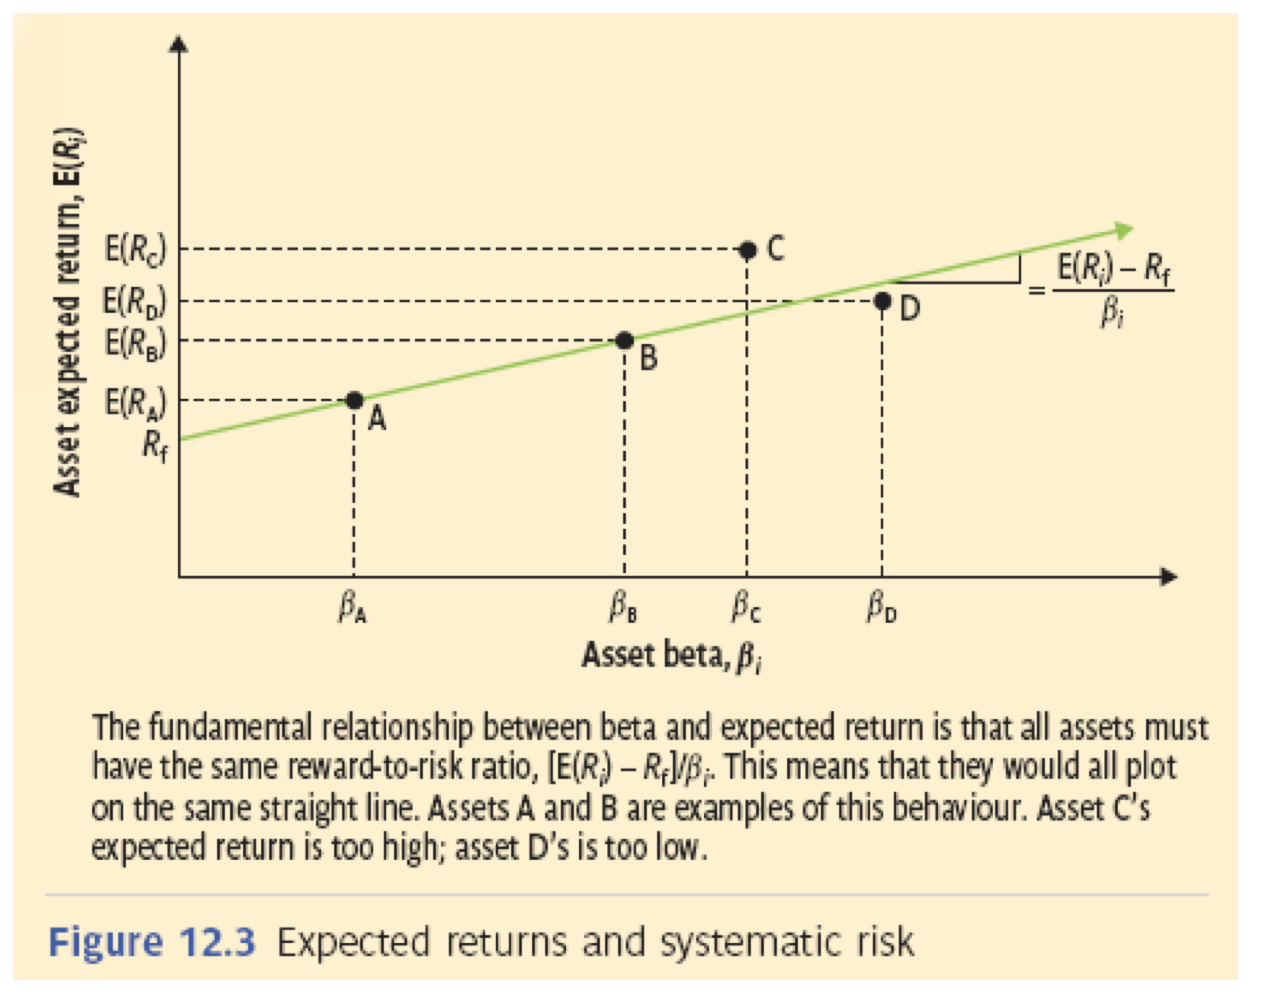

### Beta and expected market return is used in estimating cost of equity. We will look into cost of equity next.

## Chapter 2 - Cost of equity

Cost of Equity is the rate of return a company pays out to equity investors. Simply put, what is the cost the company is bearing to acquire the finance using the equity. Difficult to observe but we can estimate it.

Two ways of estimating Cost of Equity:

– Dividend Growth Model approach:usethedividendgrowthmodel“in reverse” and take as an input the market share price of the company being assessed (problem: using a price as an input defeats a bit the purpose of our modelling)
– Capital Asset Pricing Model (CAPM) approach

For this excrcise the ask is to estimate the cost of equity using CAPM model.

The CAPM formula is:

$$
E(R_i) = R_f + \beta_i (E(R_m) - R_f)
$$

Where:

- $E(R_i)$ is the expected return on equity,
- $R_f$ is the risk-free rate of interest,
- $\beta_i$ is the beta of the asset,
- $E(R_m)$ is the expected return of the market. I have considered S&P 500 Index return as the market return.

The risk-free rate of return is the theoretical rate of return of an investment with zero risk.

### Risk Free Rate of return

The risk-free rate of return is the theoretical rate of return of an investment with zero risk. Rate of retun of 13 WEEK TREASURY BILL (^IRX) is commonly used as risk free rate of return as it has zero default risk since T-bills have a U.S. government guarantee.

Source - https://www.investopedia.com/terms/t/treasurybill.asp

We will use Yahoo Finance as source to fetch the expected return of market, beta of the equites and risk free rate below. Lets exlore the data from Yahoo finance. We will use yfinance libabry in python to fetch data from Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf
import warnings

# We will be using 10 years of data observations for this excersie
start = '2013-12-31'
end = '2023-12-31'

/Users/biren/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Fetching the 13 WEEK TREASURY BILL (^IRX) historic daily data from Yahoo Finance and drop all the column but the adjusted close price.
risk_free = yf.download('^IRX',start,end).drop(columns=['Open','High','Low','Close','Volume'])
risk_free = risk_free.rename(columns = {'Adj Close': 'Risk_Free'})

# Only extacting the last record of Risk_Free to get the latest close price/return
risk_free_rate = risk_free.tail(1).iloc[0]['Risk_Free']/100

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^IRX']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


IndexError: single positional indexer is out-of-bounds

In [259]:
# Yfinance also provides the beta of equites in its Ticker function. I am fetching this beta directly to use in CAPM formula

def get_beta(equity_ticker):
    comp_data = yf.Ticker(equity_ticker)
    print("Beta of", equity_ticker, "is", comp_data.info['beta'])
    return comp_data.info['beta']

In [260]:
# Fetch the historical daily adjusted close price between dates 'start' and 'end'.

def calculate_market_rate_of_return(market_ticker):
    market = yf.download(market_ticker,start,end).drop(columns=['Open','High','Low','Close','Volume'])
    market = market.rename(columns = {'Adj Close': 'MARKET'})
    return market.pct_change()['MARKET'].mean()*252  

# pct_change() - Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.
# I am taking mean(using mean()) of the daily percentage changes(using pct_change()) of the return and then multiplyig it with 252 to annualise it.

In [261]:
# function to implements the CAMP formula to calculate and return the expected return on equity

def calculate_cost_of_equity(market_ticker,equity_ticker):
    return risk_free_rate + (calculate_market_rate_of_return(market_ticker) - risk_free_rate) * get_beta(equity_ticker)

In [262]:
cost_equity_amzn = calculate_cost_of_equity('^GSPC','AMZN')
print("Cost of equity of Amazon.com In is ",cost_equity)

[*********************100%%**********************]  1 of 1 completed

Beta of AMZN is 1.171
Cost of equity of Amazon.com In is  0.12780568558334524


In [263]:
cost_equity_msft = calculate_cost_of_equity('^GSPC','MSFT')
print("Cost of equity of Microsoft Corp is ",cost_equity_msft)

[*********************100%%**********************]  1 of 1 completed

Beta of MSFT is 0.89
Cost of equity of Microsoft Corp is  0.10427871177986686


In [264]:
cost_equity_goog = calculate_cost_of_equity('^GSPC','GOOG')
print("Cost of equity of Alphabet Inc. Class C is ",cost_equity_goog)

[*********************100%%**********************]  1 of 1 completed

Beta of GOOG is 1.044
Cost of equity of Alphabet Inc. Class C is  0.11335929816015676


## Chapter 3 - Cost of Debt

It is the expected return on equity. Cost of debt is easier to be observed.
It is simply the interest rate the firm must pay on new borrowing – The yield to maturity on outstanding bonds can be used to estimate it. This will give the pre-tax cost of debt. Tax can be removed from it to get the after tax cost of debt.

The cost of debt formula is:

$$
\text{Cost of Debt} = \frac{\text{Interest Expense}}{\text{Total Debt}} \times (1 - \text{Tax Rate})
$$

### I will get the pre-tax cost of debt from WRDS database and tax from FINRA using python libraby pyfinra

In [265]:
# I am fetching the list of all the bonds which are going to mature after 'end' date(2023-12-31) and taking the avergae of yields to estimate the pre tax cost of debt


def get_bondret_data(company_symbol):
    comp = {"comp_symbol": (company_symbol,)}
    
    import wrds
    
    #Fetch the list of cusip of all the bonds which are maturing after 2023-12-31
    conn = wrds.Connection(wrds_username='by00252')
    bond_lists= conn.raw_sql(""" select distinct cusip_id
    from trace.masterfile where mtrty_dt > '2023-12-31' and company_symbol IN %(comp_symbol)s""", params=comp)
    conn.close()
    
    print("Number of debts fetched for ",company_symbol, "from WRDS database is ",len(bond_lists.index) )

    
    if bond_lists.empty:
        print("The company_symbol is not avaiable in wrds database trace.masterfile")
        exit(1)
    
    cusp_params = {"CUSP": tuple(bond_lists['cusip_id'].to_list())}
    
    #Fetch the bondret data(includes the yield) for all the bond_list from previous step
    conn = wrds.Connection(wrds_username='by00252')
    all_bondret_data = conn.raw_sql("""select *
                        from wrdsapps_bondret.bondret
                        where date >= '2023-12-31' AND cusip IN %(CUSP)s""",params=cusp_params)
    #print(all_bondret_data)
    conn.close()
    
    return all_bondret_data

In [266]:
def pretax_get_cost_of_debt(company_symbol):
    all_bondret_data = get_bondret_data(company_symbol)
    #print('{:,.2%}'.format(all_bondret_data['yield'].mean()))
    return all_bondret_data['yield'].mean()

In [267]:
cost_debt_amzn = pretax_get_cost_of_debt("AMZN")
print(f"Cost of Debt of Amazon.com In is {'{:.2%}'.format(cost_debt_amzn)}")

Loading library list...
Done
Number of debts fetched for  AMZN from WRDS database is  51
Loading library list...
Done
Cost of Debt of Amazon.com In is 4.54%


In [268]:
cost_debt_msft = pretax_get_cost_of_debt("MSFT")
print(f"Cost of Debt of Microsoft Corp is {'{:.2%}'.format(cost_debt_msft)}")

Loading library list...
Done
Number of debts fetched for  MSFT from WRDS database is  47
Loading library list...
Done
Cost of Debt of Microsoft Corp is 4.42%


In [269]:
cost_debt_goog = pretax_get_cost_of_debt("GOOG")
print(f"Cost of Debt of Alphabet Inc. Class C is {'{:.2%}'.format(cost_debt_goog)}")

Loading library list...
Done
Number of debts fetched for  GOOG from WRDS database is  9
Loading library list...
Done
Cost of Debt of Alphabet Inc. Class C is 4.65%


In [270]:
from pyfinra.ticker import Ticker

# This function takes the company ticker and an index to look up the financial statement downloaded from pyfinra
# I am using stmt_quarter_index input variable to get data for Q4 2023 for all companies since the period of data downloaded from pyfinra is not same for all the companies 

def tax_rate_from_finra(company_ticker,stmt_quarter_index):
    aapl = Ticker(company_ticker)
    aapl_inc = aapl.financials_inc_statement()
    most_recent_quarter = aapl_inc.columns[stmt_quarter_index]
    most_recent_income_data = aapl_inc[most_recent_quarter].to_frame().droplevel(0, axis = 0)
    tax = -most_recent_income_data.loc['Provision for Income Tax'].iloc[0]
    pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]
    tax_rate = tax/pretax_income
    
    print(f"{company_ticker} effective tax rate for {most_recent_quarter} is {'{:.2%}'.format(tax_rate)}")
    return tax_rate

In [271]:
tax_rate_amzn = tax_rate_from_finra("AMZN",-2)

AMZN effective tax rate for Q4 2023 is 22.37%


In [272]:
tax_rate_msft = tax_rate_from_finra("MSFT",-4)

MSFT effective tax rate for Q4 2023 is 18.79%


In [273]:
tax_rate_goog = tax_rate_from_finra("GOOG",-2)

GOOG effective tax rate for Q4 2023 is 15.26%


# Final Chapter - Cost of Capital

Cost of capital is a calculation of the minimum return that would be necessary in order to justify undertaking a capital budgeting project, such as building a new factory. It is an evaluation of whether a projected decision can be justified by its cost.

Many companies use a combination of debt and equity to finance business expansion. For such companies, the overall cost of capital is derived from the weighted average cost of all capital sources. This is known as the weighted average cost of capital (WACC).

[Source Investopedia - https://www.investopedia.com/terms/c/costofcapital.asp ]

The Weighted Average Cost of Capital (WACC) formula is:

$$
WACC = \left( \frac{E}{V} \right) R_E + \left( \frac{D}{V} \right) R_D (1 - T_c)
$$

Where:

- $E$ is the market value of the equity,
- $V$ is the total market value of equity and debt (i.e., the value of the firm),
- $R_E$ is the cost of equity,
- $D$ is the market value of the debt,
- $R_D$ is the cost of debt,
- $T_c$ is the corporate tax rate.

In [274]:
#Fuction to calcuate and retrun the WACC using the cost of equity, pretax cost of debt and tax. 
#The market value of the equity and debt is fetcehed from FINRA financial balancesheets

def WACC(company_ticker, tax_rate, cost_debt, cost_equity):
    aapl = Ticker(company_ticker)
    aapl_bal = aapl.financials_balancesheet()
    most_recent_quarter = aapl_bal.columns[-2]
    #print(most_recent_quarter)
    most_recent_balance_data = aapl_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
    #print(most_recent_balance_data)
    debt = most_recent_balance_data.loc['Total Liabilities'].iloc[0]
    equity = most_recent_balance_data.loc['Total Equity'].iloc[0]
    return (debt/(debt+equity) *cost_debt*(1-tax_rate) + equity/(debt+equity)*cost_equity)

In [278]:
wacc_amzn = WACC("AMZN",tax_rate_amzn, cost_debt_amzn, cost_equity_amzn)
print(f"Cost of capital for Amazon.com In is {'{:.2%}'.format(wacc_amzn)}")

Cost of capital for Amazon.com In is 6.74%


In [279]:
wacc_msft = WACC("MSFT",tax_rate_msft, cost_debt_msft, cost_equity_msft)
print(f"Cost of capital for Amazon.com In is {'{:.2%}'.format(wacc_msft)}")

Cost of capital for Amazon.com In is 6.98%


In [280]:
wacc_goog = WACC("GOOG",tax_rate_goog, cost_debt_goog, cost_equity_goog)
print(f"Cost of capital for Amazon.com In is {'{:.2%}'.format(wacc_goog)}")

Cost of capital for Amazon.com In is 9.03%


### THE END - Thank you for your time